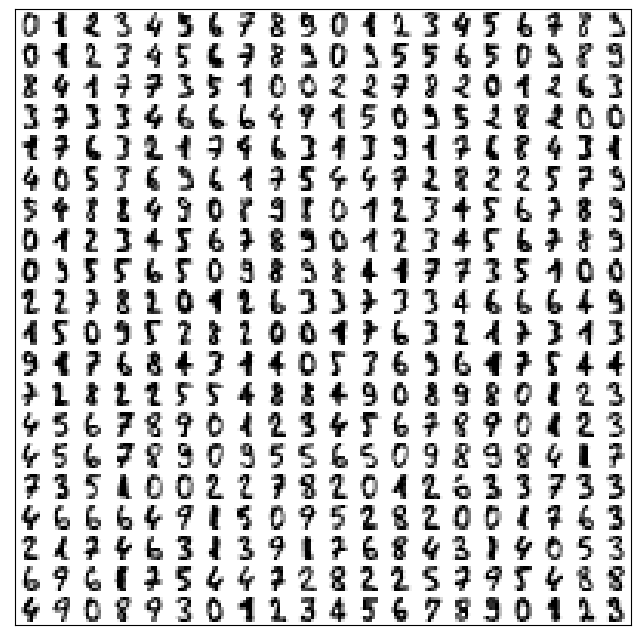

In [1]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn import datasets
from umap import UMAP

# 加载 digits(MNIST) 数据集
n_class = 10
digits = datasets.load_digits(n_class=n_class)
data, target = digits.data, digits.target
n_samples, n_features = data.shape

# 显示 digits 数据集图像
n = 20  # 每行每列 20 个数字
image = np.zeros((10 * n, 10 * n))
for i in range(n):
    ix = 10 * i + 1
    for j in range(n):
        iy = 10 * j + 1
        image[ix:ix + 8, iy:iy + 8] = data[i * n + j].reshape((8, 8))
        
plot.figure(figsize=(8, 8))
plot.imshow(image, cmap=plot.cm.binary)
plot.xticks([])
plot.yticks([])
plot.show()

D:\Softwares\Developments\Python\Python39\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


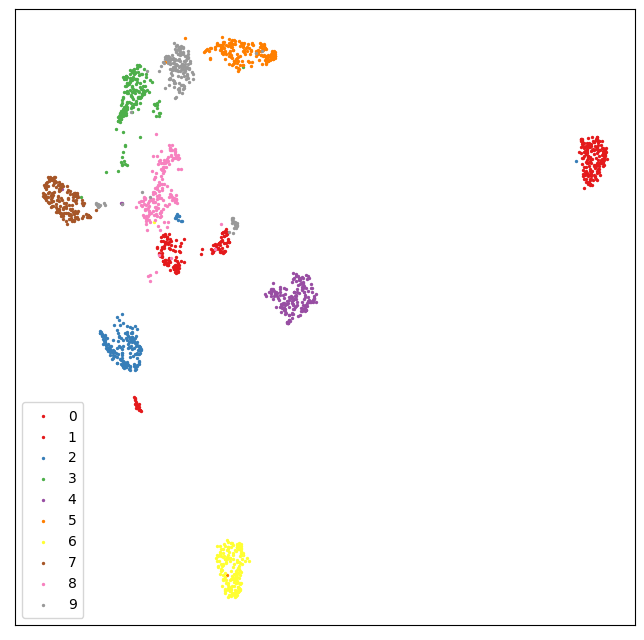

In [2]:

# 使用 UMAP 进行二维可视化
# UMAP 是一种非线性降维和可视化算法
# 参考学习文章：https://blog.csdn.net/CRUSH8496052/article/details/132926453
# 官网原始教程：https://www.geeksforgeeks.org/umap-uniform-manifold-approximation-and-projection/
reducer = UMAP(             # 以下带 "-" 的参数为chang常设置值，其他的可以取默认值
    n_neighbors=100,             # - 邻近参数，根据想探索的数据大小确定数值。
    n_components=2,              # 嵌入的空间维度，default=2
    metric='euclidean',          # 计算高维空间中距离的度量方式
    n_epochs=1000,               # default: None，用于优化低维嵌入的训练轮数。较大的值会产生更准确的嵌入结果
    learning_rate=1.0,           # default: 1.0，嵌入优化的初始学习率。
    init='spectral',             # - default: 'spectral'，它表示低维嵌入的初始化方式。可选的选项有：{'spectral', 'random', 一个初始嵌入位置的NumPy数组}。
    min_dist=0.1,                # default: 0.1，它表示嵌入点之间的有效最小距离。
    spread=1.0,                  # default: 1.0，它表示嵌入点的有效尺度。与 min_dist 结合使用，决定了嵌入点的聚集程度。
    low_memory=False,            # default: False，对于某些数据集，最近邻计算可能会消耗大量内存。如果发现 UMAP 由于内存限制而失败，请考虑将此选项设置为True。
    set_op_mix_ratio=1.0,        # default: 1.0，此参数的值应介于 0.0 和 1.0 之间；值为 1.0 将使用纯模糊并集，而值为0.0将使用纯模糊交集。
    local_connectivity=1,        # default: 1，它表示所需的局部连接性，即在局部级别上应该假设连接的最近邻数量。
    repulsion_strength=1.0,      # default: 1.0，它是在低维嵌入优化中应用于负样本的加权值。
    negative_sample_rate=5,      # default: 5，增加此值将导致应用更大的斥力力量，增加优化成本，但略微提高准确性。
    transform_queue_size=4.0,    # default: 4.0，较大的值将导致较慢的性能，但更准确的最近邻评估。
    a=None,                      # 更具体的参数，用于控制嵌入。如果为 None ，则这些值将根据 "min_dist" 和 "spread" 的确定自动设置。
    b=None,                      # default: None，用于控制嵌入。如果为 None ，则这些值将根据 "min_dist" 和 "spread" 的确定自动设置。
    random_state=42,             # - default: None，random_state 是随机数生成器使用的种子。
    metric_kwds=None,            # default: None，传递给度量函数的参数，例如 Minkowski 距离的 "p" 值。
    angular_rp_forest=False,     # default: False，是否使用角度随机投影森林来初始化近似最近邻搜索。
    target_n_neighbors=-1,       # default: -1，用于构建目标简单集的最近邻数量。如果设置为 -1，则使用 n_neighbors 的值。
    transform_seed=42,           # default: 42，用于转换操作的随机种子，用于处理转换过程中的随机性。
    verbose=False,               # default: False，控制日志输出的详细程度。
    unique=False,                # default: False，控制在进行嵌入之前是否对数据的行进行唯一化处理。如果设置为 True，则会删除重复的行，保留唯一的行。
)
x_embedding = reducer.fit_transform(data)

# 显示降维后的数据
x_min, x_max = x_embedding.min(0), x_embedding.max(0)
x_norm = (x_embedding - x_min) / (x_max - x_min)  # 显示范围归一化

# 创建表格
plot.figure(figsize=(8, 8))

# 绘制散点图
pos_groups = [[] for i in range(n_class)]
for i in range(n_samples):                  # 按类别分组
    pos_groups[target[i]].append(x_norm[i])
for i, pos_group in enumerate(pos_groups):  # 绘制每个类别的散点图
    x = [pos[0] for pos in pos_group]
    y = [pos[1] for pos in pos_group]
    plot.scatter(x=x, y=y, s=2,
                 color=plot.cm.Set1(target[i] / 10.),
                 label=str(target[i]))
plot.xticks([])
plot.yticks([])
plot.legend(loc='best',       # 图例位置
            scatterpoints=1,  # 图例显示方式
            frameon=True,     # 边框显示，默认为 False
            fancybox=True,    # 边框圆角，默认为 True
            borderpad=0.5)    # 边框距离，默认为 0.4
plot.show()